<a href="https://colab.research.google.com/github/Ankush169/BTP/blob/main/Copy_of_weighted_focal_Cropped_of_Acdc_300_epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# This will prompt you to click a link and provide an authorization code
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


import glob
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from datetime import datetime
import cv2
from PIL import Image
from keras import backend, optimizers
import nibabel as nib
import h5py
from tensorflow.keras.utils import normalize

In [ ]:
import tensorflow as tf


In [ ]:
!pip install segmentation_models


In [ ]:
from segmentation_models.losses import CategoricalCELoss

Segmentation Models: using `keras` framework.


In [ ]:
class_weights = [1,3,4,2]


In [ ]:
class_weights = np.asarray(class_weights)

In [ ]:
print(len(class_weights))

4


In [ ]:
loss = CategoricalCELoss(class_weights = class_weights)



In [ ]:
import keras

In [ ]:
keras.__version__

'2.14.0'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [ ]:
!nvidia-smi


Tue Nov 28 07:41:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
file_path = '/content/drive/MyDrive/Cardiac/train_data/acdc_myo199_colget2_208_uint8.hdf5'
if os.path.exists(file_path):
    print(f"The file at '{file_path}' exists.")
else:
    print(f"The file at '{file_path}' does not exist.")


The file at '/content/drive/MyDrive/Cardiac/train_data/acdc_myo199_colget2_208_uint8.hdf5' exists.


In [ ]:
f = h5py.File('/content/drive/MyDrive/Cardiac/train_data/acdc_myo199_colget2_208_uint8.hdf5','r')

input_data = f['images'][...]

label_data = f['masks'][...]





In [ ]:
f = h5py.File('/content/drive/MyDrive/Cardiac/train_data/acdc_myo199_cot2_rotaug_208_uint8_AA(2).hdf5','r')

input_data = f['images'][...]

label_data = f['masks'][...]





In [ ]:
f = h5py.File('/content/drive/MyDrive/Cardiac/train_data/acdc_myo199_colget2_rotaug_208_uint8_FU_acdc_mscmr.hdf5','r')

input_data = f['images'][...]

label_data = f['masks'][...]





In [ ]:
f = h5py.File('/content/drive/MyDrive/Cardiac/train_data/acdc_myo199_colget2_rotaug_208_uint8_FU_mscmr_acdc_AA.hdf5','r')

input_data = f['images'][...]

label_data = f['masks'][...]





In [ ]:
f = h5py.File('/content/drive/MyDrive/Cardiac/train_data/acdc_myo199_colget2_rotaug_208_uint8_FU.hdf5','r')

input_data = f['images'][...]

label_data = f['masks'][...]





In [ ]:
f = h5py.File('/content/drive/MyDrive/Cardiac/train_data/M&M_208_uint8(2).hdf5','r')

input_data = f['images'][...]

label_data = f['masks'][...]





In [ ]:
f = h5py.File('/content/drive/MyDrive/Cardiac/train_data/M&M_208__rotaug_uint8(2).hdf5','r')

input_data = f['images'][...]

label_data = f['masks'][...]





In [ ]:
f = h5py.File('/content/drive/MyDrive/Cardiac/train_data/M&M_Training_208_uint8_sf.hdf5','r')

input_data = f['images'][...]

label_data = f['masks'][...]





In [ ]:
f_val = h5py.File('/content/drive/MyDrive/Cardiac/train_data/M&M_Validation_208_uint8.hdf5','r')

input_data_val = f_val['images'][...]

label_data_val = f_val['masks'][...]





In [ ]:
print(label_data.shape)


#print(label_data_val.shape)



(5128, 208, 208)


In [ ]:
print(np.unique(label_data))

#print(np.unique(label_data_val))



[0 1 2 3]


In [ ]:
print(input_data.shape)
#print(input_data_val.shape)


print(label_data.shape)
#print(label_data_val.shape)


(5128, 208, 208)
(5128, 208, 208)


In [ ]:
image_dataset = np.expand_dims(input_data,3)
#val_img_dataset = np.expand_dims(input_data_val,3)


mask_dataset = np.expand_dims(label_data,3)

#val_mask_dataset= np.expand_dims(label_data_val,3)




In [ ]:
print(image_dataset.shape)
print(mask_dataset.shape)

#print(val_img_dataset.shape)
#print(val_mask_dataset.shape)


(5128, 208, 208, 1)
(5128, 208, 208, 1)


In [ ]:


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size= 0.10, random_state = 0)


In [ ]:
X_train = image_dataset
y_train = mask_dataset

#X_test = val_img_dataset
#y_test = val_mask_dataset

In [ ]:
X_test.shape


(513, 208, 208, 1)

In [ ]:
X_train.shape

(5128, 208, 208, 1)

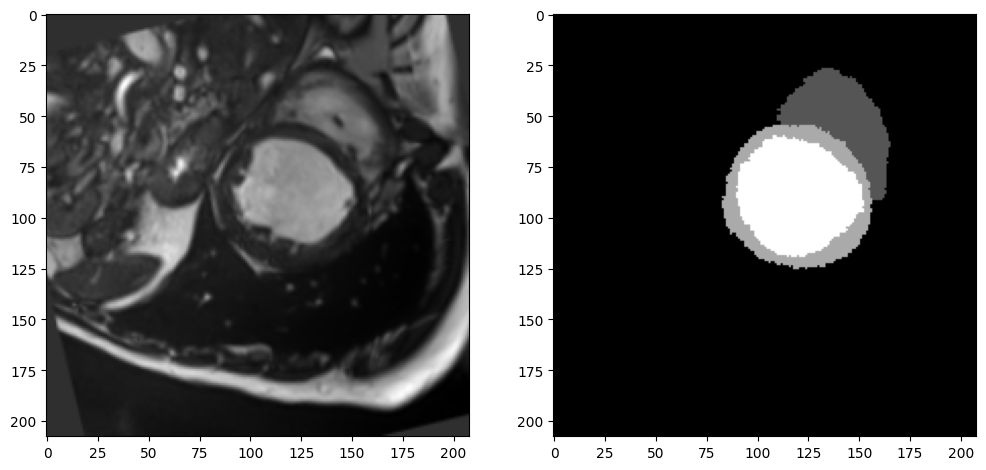

In [ ]:
import random
import numpy as np
image_number = random.randint(0, len(X_train))

test_number = random.randint(0,len(y_train))

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (208,208)), cmap='gray')

plt.subplot(122)

plt.imshow(np.reshape(y_train[image_number], (208, 208)), cmap='gray')


plt.show()




In [ ]:

from tensorflow.keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=4)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], 4))


test_masks_cat = to_categorical(y_test, num_classes=4)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], 4))


In [ ]:
print(y_test_cat.shape)



(513, 208, 208, 4)


In [ ]:
y_train_cat.shape


(5128, 208, 208, 4)

In [ ]:

#Parameters for model

IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH = X_train.shape[2]


IMG_CHANNELS = X_train.shape[3]

num_labels = 4  # binary

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
batch_size = 8

In [ ]:
loss = CategoricalFocalLoss()


NameError: ignored

In [ ]:
#from tensorflow.tools.docs.doc_controls import T
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers

from tensorflow.keras import backend as K

'''
metrics and losses
'''

from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, add, Permute, Conv2D
from keras import backend as K


def squeeze_excite_block(input, ratio=16):
    ''' Create a channel-wise squeeze-excite block
    Args:
        input: input tensor
        filters: number of output filters
    Returns: a keras tensor
    References
    -   [Squeeze and Excitation Networks](https://arxiv.org/abs/1709.01507)
    '''
    init = input
    channel_axis = 1 if K.image_data_format() == "channels_first" else -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    if K.image_data_format() == 'channels_first':
        se = Permute((3, 1, 2))(se)

    x = multiply([init, se])
    return x

def spatial_squeeze_excite_block(input):
    ''' Create a spatial squeeze-excite block
    Args:
        input: input tensor
    Returns: a keras tensor
    References
    -   [Concurrent Spatial and Channel Squeeze & Excitation in Fully Convolutional Networks](https://arxiv.org/abs/1803.02579)
    '''

    se = Conv2D(1, (1, 1), activation='sigmoid', use_bias=False,
                kernel_initializer='he_normal')(input)

    x = multiply([input, se])
    return x


def channel_spatial_squeeze_excite(input, ratio=16):
    ''' Create a spatial squeeze-excite block
    Args:
        input: input tensor
        filters: number of output filters
    Returns: a keras tensor
    References
    -   [Squeeze and Excitation Networks](https://arxiv.org/abs/1709.01507)
    -   [Concurrent Spatial and Channel Squeeze & Excitation in Fully Convolutional Networks](https://arxiv.org/abs/1803.02579)
    '''

    cse = squeeze_excite_block(input, ratio)
    sse = spatial_squeeze_excite_block(input)

    x = add([cse, sse])
    return x




def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)


def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def dconv_block(x, filter_size, size, dropout, dilation_factor, batch_norm=False):

  dconv = layers.Conv2D(size, (filter_size, filter_size),  padding = "same", dilation_rate = (dilation_factor, dilation_factor))(x)

  if batch_norm is True:
    dconv = layers.BatchNormalization(axis=3)(dconv)
  dconv = layers.Activation("relu")(dconv)

  return dconv

def miSE_res_Dconv_net(input_shape, NUM_CLASSES=4, drop_rate=0.0, batch_norm=True):

  '''
  Res_Dconv_net,
  '''

  #network structure
  FILTER_NUM = 16 # number of filters for the first layer
  FILTER_SIZE = 3 # size of the convolutional filter
  UPSAMP_SIZE = 2 # size of the upsampling filters
  DILATION_RATE = 1 #


  inputs = layers.Input(input_shape, dtype=tf.float32)

  # Network start
  dconv_1 = dconv_block(inputs, 9, FILTER_NUM, drop_rate, DILATION_RATE, batch_norm= True)
  dconv_2 = dconv_block(dconv_1, 7, FILTER_NUM*4, drop_rate, DILATION_RATE*2, batch_norm = True)

  dconv_3 = dconv_block(dconv_2, 5, FILTER_NUM*4, drop_rate, DILATION_RATE*4, batch_norm = True)



  dconv_4 = dconv_block(dconv_3, 3, FILTER_NUM*4, drop_rate, DILATION_RATE*6, batch_norm= True)

  shortcut = layers.Conv2D(FILTER_NUM*4, (1,1), padding = 'same')(dconv_3)
  shortcut = layers.BatchNormalization(axis=3)(shortcut)
  shortcut = layers.Activation("relu")(shortcut)
  res_path_1 = layers.add([shortcut, dconv_4])
  res_path_1 =layers.Activation("relu")(res_path_1)
  se = channel_spatial_squeeze_excite(res_path_1, ratio=8)

  dconv_5 = dconv_block(se, 3, FILTER_NUM*8, drop_rate, DILATION_RATE*8, batch_norm = True)

  shortcut = layers.Conv2D(FILTER_NUM*8, (1,1), padding = 'same')(dconv_2)
  shortcut = layers.BatchNormalization(axis=3)(shortcut)
  shortcut = layers.Activation("relu")(shortcut)
  res_path_2 = layers.add([shortcut, dconv_5])
  res_path_2 = layers.Activation("relu")(res_path_2)
  se_2 = channel_spatial_squeeze_excite(res_path_2, ratio=8)


  dconv_6 = dconv_block(se_2, 3, FILTER_NUM*4, drop_rate, DILATION_RATE*4, batch_norm= True)

  # 1*1 Convolution layer
  dconv_final = layers.Conv2D(NUM_CLASSES, (1,1), padding= 'same')(dconv_6)
  dconv_final = layers.BatchNormalization(axis=3)(dconv_final)
  dconv_final = layers.Activation('softmax')(dconv_final)

  # Define model
  model = models.Model(inputs, dconv_final, name= "lese_res_Dconet")
  print(model.summary())
  return model

input_shape = (208,208,1)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 24 16:52:36 2021

@author: SanjeetXlar
"""


import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K




'''
A few useful metrics and losses
'''

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)


def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


##############################################################
'''
Useful blocks to build Unet
conv - BN - Activation - conv - BN - Activation - Dropout (if enabled)
'''


def conv_block(x, filter_size, size, dropout, batch_norm=False):

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    return conv


def repeat_elem(tensor, rep):
    # lambda function to repeat Repeats the elements of a tensor along an axis
    #by a factor of rep.
    # If tensor has shape (None, 256,256,3), lambda will return a tensor of shape
    #(None, 256,256,6), if specified axis=3 and rep=2.

     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)

def SEres_conv_block(x, filter_size, size, dropout, batch_norm=False):
    '''
    Residual convolutional layer.
    Two variants....
    Either put activation function before the addition with shortcut
    or after the addition (which would be as proposed in the original resNet).

    1. conv - BN - Activation - conv - BN - Activation
                                          - shortcut  - BN - shortcut+BN

    2. conv - BN - Activation - conv - BN
                                     - shortcut  - BN - shortcut+BN - Activation

    Check fig 4 in https://arxiv.org/ftp/arxiv/papers/1802/1802.06955.pdf
    '''

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    #conv = layers.Activation('relu')(conv)    #Activation before addition with shortcut
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)
    se = channel_spatial_squeeze_excite(res_path, ratio=8)    #Activation after addition with shortcut (Original residual block)
    return se

def res_conv_block(x, filter_size, size, dropout, batch_norm=False):
    '''
    Residual convolutional layer.
    Two variants....
    Either put activation function before the addition with shortcut
    or after the addition (which would be as proposed in the original resNet).

    1. conv - BN - Activation - conv - BN - Activation
                                          - shortcut  - BN - shortcut+BN

    2. conv - BN - Activation - conv - BN
                                     - shortcut  - BN - shortcut+BN - Activation

    Check fig 4 in https://arxiv.org/ftp/arxiv/papers/1802/1802.06955.pdf
    '''

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    #conv = layers.Activation('relu')(conv)    #Activation before addition with shortcut
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)    #Activation after addition with shortcut (Original residual block)
    return res_path

def gating_signal(input, out_size, batch_norm=False):
    """
    resize the down layer feature map into the same dimension as the up layer feature map
    using 1x1 conv
    :return: the gating feature map with the same dimension of the up layer feature map
    """
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

# Getting the x signal to the same shape as the gating signal
    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

# Getting the gating signal to the same number of filters as the inter_shape
    phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3),
                                 strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
                                 padding='same')(phi_g)  # 16

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    upsample_psi = repeat_elem(upsample_psi, shape_x[3])

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn




def UNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):
    '''
    UNet,

    '''
    # network structure
    FILTER_NUM = 64 # number of filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters


    inputs = layers.Input(input_shape, dtype=tf.float32)

    # Downsampling layers
    # DownRes 1, convolution + pooling
    conv_128 = conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers

    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, conv_16], axis=3)
    up_conv_16 = conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7

    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, conv_32], axis=3)
    up_conv_32 = conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8

    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, conv_64], axis=3)
    up_conv_64 = conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9

    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, conv_128], axis=3)
    up_conv_128 = conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers

    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model
    model = models.Model(inputs, conv_final, name="UNet")
    print(model.summary())
    return model

def Attention_UNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):
    '''
    Attention UNet,

    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters

    inputs = layers.Input(input_shape, dtype=tf.float32)

    # Downsampling layers
    # DownRes 1, convolution + pooling
    conv_128 = conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=3)
    up_conv_16 = conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=3)
    up_conv_32 = conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=3)
    up_conv_64 = conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=3)
    up_conv_128 = conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="Attention_UNet")
    return model

def Attention_ResUNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):
    '''
    Rsidual UNet, with attention

    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters
    # input data
    # dimension of the image depth
    inputs = layers.Input(input_shape, dtype=tf.float32)
    axis = 3

    # Downsampling layers
    # DownRes 1, double residual convolution + pooling
    conv_128 = res_conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = res_conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = res_conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = res_conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = res_conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=axis)
    up_conv_16 = res_conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=axis)
    up_conv_32 = res_conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=axis)
    up_conv_64 = res_conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=axis)
    up_conv_128 = res_conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers

    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=axis)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="AttentionResUNet")
    return model


def Attention_SEResUNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):
    '''
    Rsidual UNet, with attention

    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters
    # input data
    # dimension of the image depth
    inputs = layers.Input(input_shape, dtype=tf.float32)
    axis = 3

    # Downsampling layers
    # DownRes 1, double residual convolution + pooling
    conv_128 = SEres_conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = SEres_conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = SEres_conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = SEres_conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = SEres_conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=axis)
    up_conv_16 = SEres_conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=axis)
    up_conv_32 = SEres_conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=axis)
    up_conv_64 = SEres_conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=axis)
    up_conv_128 = SEres_conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers

    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=axis)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="AttentionResUNet")
    return model

input_shape = (208,208,1)
#UNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 24 16:52:36 2021

@author: SanjeetXlar
"""


import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K




'''
A few useful metrics and losses
'''

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)


def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


##############################################################
'''
Useful blocks to build Unet
conv - BN - Activation - conv - BN - Activation - Dropout (if enabled)
'''


def conv_block(x, filter_size, size, dropout, batch_norm=False):

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    return conv


def repeat_elem(tensor, rep):
    # lambda function to repeat Repeats the elements of a tensor along an axis
    #by a factor of rep.
    # If tensor has shape (None, 256,256,3), lambda will return a tensor of shape
    #(None, 256,256,6), if specified axis=3 and rep=2.

     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)


def res_conv_block(x, filter_size, size, dropout, batch_norm=False):
    '''
    Residual convolutional layer.
    Two variants....
    Either put activation function before the addition with shortcut
    or after the addition (which would be as proposed in the original resNet).

    1. conv - BN - Activation - conv - BN - Activation
                                          - shortcut  - BN - shortcut+BN

    2. conv - BN - Activation - conv - BN
                                     - shortcut  - BN - shortcut+BN - Activation

    Check fig 4 in https://arxiv.org/ftp/arxiv/papers/1802/1802.06955.pdf
    '''

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    #conv = layers.Activation('relu')(conv)    #Activation before addition with shortcut
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)    #Activation after addition with shortcut (Original residual block)
    return res_path

def gating_signal(input, out_size, batch_norm=False):
    """
    resize the down layer feature map into the same dimension as the up layer feature map
    using 1x1 conv
    :return: the gating feature map with the same dimension of the up layer feature map
    """
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

# Getting the x signal to the same shape as the gating signal
    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

# Getting the gating signal to the same number of filters as the inter_shape
    phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3),
                                 strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
                                 padding='same')(phi_g)  # 16

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    upsample_psi = repeat_elem(upsample_psi, shape_x[3])

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn




def UNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):
    '''
    UNet,

    '''
    # network structure
    FILTER_NUM = 64 # number of filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters


    inputs = layers.Input(input_shape, dtype=tf.float32)

    # Downsampling layers
    # DownRes 1, convolution + pooling
    conv_128 = conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers

    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, conv_16], axis=3)
    up_conv_16 = conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7

    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, conv_32], axis=3)
    up_conv_32 = conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8

    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, conv_64], axis=3)
    up_conv_64 = conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9

    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, conv_128], axis=3)
    up_conv_128 = conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers

    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model
    model = models.Model(inputs, conv_final, name="UNet")
    print(model.summary())
    return model

def Attention_UNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):
    '''
    Attention UNet,

    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters

    inputs = layers.Input(input_shape, dtype=tf.float32)

    # Downsampling layers
    # DownRes 1, convolution + pooling
    conv_128 = conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=3)
    up_conv_16 = conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=3)
    up_conv_32 = conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=3)
    up_conv_64 = conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=3)
    up_conv_128 = conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="Attention_UNet")
    return model

def Attention_ResUNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):
    '''
    Rsidual UNet, with attention

    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters
    # input data
    # dimension of the image depth
    inputs = layers.Input(input_shape, dtype=tf.float32)
    axis = 3

    # Downsampling layers
    # DownRes 1, double residual convolution + pooling
    conv_128 = res_conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = res_conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = res_conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = res_conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = res_conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=axis)
    up_conv_16 = res_conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=axis)
    up_conv_32 = res_conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=axis)
    up_conv_64 = res_conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=axis)
    up_conv_128 = res_conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers

    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=axis)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="AttentionResUNet")
    return model

input_shape = (208,208,1)
UNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True)

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 208, 208, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 208, 208, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 208, 208, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 208, 208, 64)         0         ['batch_normalization[0][0]

In [ ]:
att_res_unet = Attention_ResUNet(input_shape)

In [ ]:
print(att_res_unet.summary()
)

Attention res unet with concatenation


In [ ]:
att_unet = Attention_UNet(input_shape)


In [ ]:
att_unet.summary()

In [ ]:
att_res_unet_model = Attention_ResUNet_concat(input_shape)

In [ ]:
att_res_unet2.compile(optimizer=Adam(learning_rate = 1e-3), loss= loss, metrics=[dice_coef, jacard_coef])


In [ ]:
att_seres_unet2.compile(optimizer=Adam(learning_rate = 1e-3), loss= loss, metrics=[dice_coef, jacard_coef])

In [ ]:
print(att_res_unet_model.summary())

In [ ]:
att_res_unet.compile(optimizer=Adam(learning_rate = 1e-3), loss= loss, metrics=[dice_coef, jacard_coef])


In [ ]:

unet_model = UNet(input_shape)
unet_model.compile(optimizer=Adam(learning_rate = 1e-3), loss= loss, metrics=[dice_coef, jacard_coef])



Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 208, 208, 1)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 208, 208, 64)         640       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_19 (Ba  (None, 208, 208, 64)         256       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_19 (Activation)  (None, 208, 208, 64)         0         ['batch_normalization_19[0]

In [ ]:

# we create two instances with the same arguments
#data_gen_args = dict(featurewise_center=False,
#                     featurewise_std_normalization=False,
#                     rotation_range=0,
#                     width_shift_range=0,
#                     height_shift_range=0,
#                     zoom_range=0)

image_datagen = ImageDataGenerator()
mask_datagen = ImageDataGenerator()


#valid_datagen = image_datagen.flow()
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 24

image_datagen.fit(X_train, augment=False, seed=seed)
mask_datagen.fit(y_train_cat, augment=False, seed=seed)
image_generator = image_datagen.flow(X_train, batch_size = 16, seed=seed)
mask_generator = mask_datagen.flow(y_train_cat, batch_size = 16, seed=seed)

valid_img_generator = image_datagen.flow(X_test, batch_size = 16, seed=seed)

valid_mask_generator = mask_datagen.flow(y_test_cat, batch_size = 16, seed=seed)



# combine generators into one which yields image and masks

def my_image_mask_generator(image_generator, mask_generator):

    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
      yield (img, mask)

my_generator = my_image_mask_generator(image_generator, mask_generator)

validation_datagen = my_image_mask_generator(valid_img_generator, valid_mask_generator)




In [ ]:
print(image_generator)

In [ ]:
x = image_generator.next()
y = mask_generator.next()


In [ ]:
x = image_generator.next()
y = mask_generator.next()

print(x.shape)
print(y.shape)

#for i in range(0,1):
image = x[3,:,:,:]
mask = y[3,:,:,1]
plt.subplot(1,2,1)
plt.imshow(image[:,:,0], cmap='gray')
plt.subplot(1,2,2)

plt.imshow(mask, cmap='gray')
plt.show()




In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/Cardiac/Trained_models/m&m_whole_6764'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [ ]:

att_res_unet2.load_weights('/content/drive/MyDrive/Cardiac/Trained_models/Changed_weights_cropped_acdc_colget2_att_res_unet_176_aug_5128_200.hdf5')


In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/Cardiac/Trained_models/unet_rotaaug_acdc_clget2_250'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


In [ ]:
unet_model.load_weights('/content/drive/MyDrive/Cardiac/Trained_models/changed_weights _208_acdc_colget2_5128_unet_250.hdf5')

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/Cardiac/Trained_models/unet_rotaaug_acdc_clget2_250/checkpoint'
#model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#    filepath=checkpoint_filepath,
#    save_weights_only=True,
#    monitor='val_loss',
#    mode='min',
#    save_best_only=True)

csv_path = '/content/drive/MyDrive/Cardiac/Trained_models/unet_rotaaug_acdc_clget2_250/unet_250.csv'

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard


callbacks = [ModelCheckpoint(filepath = checkpoint_filepath, save_weights_only=True, monitor='val_loss', mode = 'min',  verbose=1, save_best_only=True),
             ReduceLROnPlateau(monitor="val_dice_coef", factor=0.1, patience=50, min_lr=1e-6, verbose=1),
             CSVLogger(csv_path), TensorBoard(), EarlyStopping(monitor="val_dice_coeff", patience=30,  restore_best_weights=False)]

In [ ]:

start1 = datetime.now()
unet_history = unet_model.fit(my_generator, verbose=1, validation_data= validation_datagen, steps_per_epoch=200,validation_steps= 200,
                              shuffle = False, epochs=39, callbacks=callbacks)

stop1 = datetime.now()

#Execution time of the model
execution_time_Unet = stop1-start1

print("att_res_Unet execution time is:", execution_time_Unet)

unet_model.save('/content/drive/MyDrive/Cardiac/Trained_models/unet_250.hdf5')


NameError: ignored

In [ ]:

start1 = datetime.now()
att_res_unet_history = att_res_unet.fit(my_generator, verbose=1, validation_data= validation_datagen, steps_per_epoch=200,validation_steps= 200,
                              shuffle = False, epochs=200, callbacks=callbacks)

stop1 = datetime.now()

#Execution time of the model
execution_time_Unet = stop1-start1

print("att_res_Unet execution time is:", execution_time_Unet)


att_res_unet.save('/content/drive/MyDrive/Cardiac/Trained_models/acdc_colget_fu_slices_rotaug_5194_att_res_unet.hdf5')


In [ ]:

start1 = datetime.now()
att_res_unet_history = att_res_unet.fit(my_generator, verbose=1, validation_data= validation_datagen, steps_per_epoch=200,validation_steps= 200,
                              shuffle = False, epochs=200, callbacks=callbacks)

stop1 = datetime.now()

#Execution time of the model
execution_time_Unet = stop1-start1

print("att_res_Unet execution time is:", execution_time_Unet)


att_res_unet.save('/content/drive/MyDrive/Cardiac/Trained_models/acdc_colget_fu_slices_rotaug_5336_att_res_unet.hdf5')


In [ ]:

start1 = datetime.now()
unet_history = unet_model.fit(my_generator, verbose=1, validation_data= validation_datagen, steps_per_epoch=200,validation_steps= 250,
                              shuffle = False, epochs=250)

stop1 = datetime.now()

#Execution time of the model
execution_time_Unet = stop1-start1

print("Unet execution time is:", execution_time_Unet)




unet_model.save('/content/drive/MyDrive/Cardiac/cropped_208_acdc_colget2_unet_208_rotaaug_5128_200.hdf5')


In [ ]:
unet_model = UNet(input_shape)

In [ ]:
#model = get_model()
unet_model.load_weights('/content/drive/MyDrive/Cardiac/cropped_208_acdc_colget2_unet_176_aug_5128_200.hdf5')
#model.load_weights('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')

In [ ]:
start1 = datetime.now()
unet_history = unet_model.fit(my_generator, verbose=1, validation_data= validation_datagen, steps_per_epoch=200,validation_steps= 250,
                              shuffle = False, epochs=200)

stop1 = datetime.now()

#Execution time of the model
execution_time_Unet = stop1-start1

print("Unet execution time is:", execution_time_Unet)




unet_model.save('/content/drive/MyDrive/Cardiac/Retrain_cropped_208_acdc_colget2_unet_176_aug_5128_200.hdf5')

In [ ]:
loaded_model = models.load_model('/content/drive/MyDrive/Cardiac/Trained_models/cropped_208_acdc_colget2_unet_176_aug_5128_200.hdf5')

In [ ]:
X_test.shape

(513, 208, 208, 1)

In [ ]:
#IOU
y_pred=unet_model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


17/17 [==============================] - 24s 420ms/step


In [ ]:
y_pred_argmax.shape

(513, 208, 208)

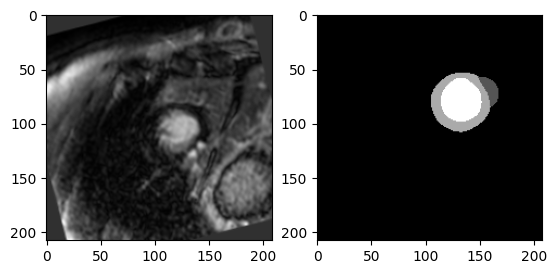

In [ ]:
plt.subplot(1,2,1)
plt.imshow(X_test[15,:,:,0], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(y_pred_argmax[111,:,:], cmap = 'gray')


In [ ]:
from PIL import Image

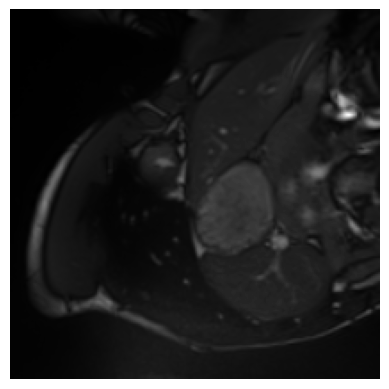

In [ ]:

selected_image = X_test[115, :, :, 0]
plt.imshow(selected_image,cmap='gray')
plt.axis('off')
plt.savefig('selected_image.png',pad_inches=0)


# Convert the NumPy array to a PIL Image
#image_to_save = Image.fromarray((selected_image * 255))

# Save the image as PNG
#image_to_save.save('saved_image.png')

# Save the image as JPG
#image_to_save.save('saved_image.jpg')

In [ ]:
import cv2

selected_image = X_test[15, :, :, 0]
selected_image=(selected_image -np.min(selected_image))/(np.max(selected_image) -np.min(selected_image))

# Rescale values to the range [0, 255]
#selected_image_rescaled = (selected_image * 255).astype(np.uint8))

# Save the image using OpenCV
cv2.imwrite('selected_image_opencv16.png', selected_image*255)

True

Dice score cells followed by IOU cells


In [ ]:
pip install MedPy


In [ ]:
import pandas as pd
from medpy.metric.binary import hd, dc, assd
import os

In [ ]:
dir_gt = os.path.join('/content/drive/MyDrive/Sunnybrook/final_scd_gt')
dir_og = os.path.join('/content/drive/MyDrive/Sunnybrook/JPEGs')

In [ ]:
!pip install pillow


In [ ]:
import glob
from PIL import Image
import numpy as np


In [ ]:
!pip install pydicom

In [ ]:
from skimage import transform

In [ ]:
from pydicom import dcmread

In [ ]:
print(data.shape)

In [ ]:
#filenames_gt = sorted(glob(os.path.join(dir_gt)), key= natural_order)

filenames_gt = os.listdir(os.path.join(dir_gt))
print(sorted(filenames_gt))


filenames_og = os.listdir(os.path.join(dir_og))
print(sorted(filenames_og))

In [ ]:
file = '/content/drive/MyDrive/Sunnybrook/Di_GT/SC-HF-NI-04/IM-0001-0041.dcm'

ds = dcmread(file)
#print(ds)

pixel_size = ds.PixelSpacing

image = ds.pixel_array

In [ ]:
os.mkdir('/content/drive/MyDrive/Sunnybrook/J_pred')

for folder in filenames_og:

  folder_path = os.path.join(dir_og,folder)







In [ ]:
!pip install pydicom

In [ ]:
target_resolution = (1.25,1.25)

In [ ]:

def normalise_image(image):
    '''
    make image zero mean and unit standard deviation
    '''

    img_o = np.float32(image.copy())
    m = np.mean(img_o)
    s = np.std(img_o)
    return np.divide((img_o - m), s)


In [ ]:

scale_vector = [pixel_size[0] / target_resolution[0], pixel_size[1] / target_resolution[1]]

In [ ]:


def crop_or_pad_slice_to_size(slice, nx, ny):

    x, y = slice.shape

    x_s = (x - nx) // 2
    y_s = (y - ny) // 2
    x_c = (nx - x) // 2
    y_c = (ny - y) // 2

    if x > nx and y > ny:
        slice_cropped = slice[x_s:x_s + nx, y_s:y_s + ny]
    else:
        slice_cropped = np.zeros((nx, ny))
        if x <= nx and y > ny:
            slice_cropped[x_c:x_c + x, :] = slice[:, y_s:y_s + ny]
        elif x > nx and y <= ny:
            slice_cropped[:, y_c:y_c + y] = slice[x_s:x_s + nx, :]
        else:
            slice_cropped[x_c:x_c + x, y_c:y_c + y] = slice[:, :]

    return slice_cropped


In [ ]:
file = os.path.join('/content/drive/MyDrive/Sunnybrook/GT_raw/SC-HF-I-01/IM-0001-0059_gt_gt.npy')

arr = np.load(file)

np.unique(arr)

In [ ]:
path = '/content/drive/MyDrive/Sunnybrook/GT_raw'

folders = os.listdir(path)

dict = {}

for folder in folders:

  X_test = []
  X_gt = []
  folder_path = os.path.join(path, folder)

  for file in os.listdir(folder_path):

    file_base = file.split('.')[0]

    file_prefix = file_base.split('_')[-1]

    if file_prefix == 'dcm':

      file_path = os.path.join(folder_path, file)

      X = np.load(file_path)
      X_norm = normalise_image(X)
      X_scaled = transform.rescale(X_norm,
                                  scale_vector,
                                  order=1,
                                  preserve_range=True,
                                          multichannel=False, mode = 'constant')

      X_cropped = crop_or_pad_slice_to_size(X_scaled,256,256)

      X_test.append(X_cropped)

    elif file_prefix == 'gt':

       file_path = os.path.join(folder_path, file)

       gtu = np.load(file_path)

       X_gt.append(gtu)


  X_gtu = np.asarray(X_gt)
  #print(X_gtu.shape)
  X_testy = np.asarray(X_test)


  X_test_dim = np.expand_dims(X_testy,3)

  y_pred=unet_model.predict(X_test_dim)
  y_pred_argmax=np.argmax(y_pred, axis=3)
  print(np.unique(y_pred_argmax))

  gt_binary = (X_gtu == 2) * 1
  print(np.count_nonzero(gt_binary==1))

  pred_one = np.where(y_pred_argmax == 3, 0, y_pred_argmax)
  pred_two = np.where(pred_one == 1, 0, pred_one)
  print(np.unique(pred_two))


  pred_binary = (pred_two == 2) * 1
  print(np.count_nonzero(pred_binary==1))

  dict[folder] = dc(gt_binary, pred_binary)




In [ ]:
print(dict)

In [ ]:
raw = '/content/drive/MyDrive/Sunnybrook/GT_raw/SC-HF-I-01/IM-0001-0119_dcm.npy'

gt =  '/content/drive/MyDrive/Sunnybrook/GT_raw/SC-HF-I-01/IM-0001-0119_gt_gt.npy'


x = np.load(raw)

x_gt = np.load(gt)

x_test = np.expand_dims(x,(0,3))

y_pred = unet_model.predict(x_test)
y_pred_argmax = np.argmax(y_pred, axis=3)

plt.subplot(1,2,1)
plt.imshow(x, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(y_pred_argmax[0,:,:], cmap = 'gray')
#plt.subplot(1,2,2)
#plt.imshow(x_gt, cmap= 'gray')


In [ ]:
file = '/content/drive/MyDrive/Sunnybrook/Di_GT/SC-HF-I-01/IM-0001-0079.dcm'

ds = dcmread(file)
#print(ds)

pixel_size = ds.PixelSpacing

image_new = ds.pixel_array

In [ ]:
image_norm = normalise_image(image_new)

In [ ]:
image_rescaled = transform.rescale(image_norm,
                                               scale_vector,
                                                order=1,
                                                preserve_range=True,
                                                multichannel=False,
                                                mode = 'constant')


In [ ]:
image_rescaled.shape


In [ ]:
img_crop = crop_or_pad_slice_to_size(image_rescaled, 256, 256)


In [ ]:
new_img = np.expand_dims(img_crop,(0,3))

In [ ]:
new_img.shape

In [ ]:
#X_dims = np.expand_dims(slice_rescaled,(0,3))

x_test = crop_or_pad_slice_to_size(slice_rescaled, 256, 256)

x_dims = np.expand_dims(x_test,(0,3))


print(x_dims.shape)

In [ ]:
y_pred=unet_model.predict(new_img)
y_pred_argmax=np.argmax(y_pred, axis=3)


In [ ]:
y_pred_argmax.shape

In [ ]:
pred_one = np.where(y_pred_argmax == 3, 0, y_pred_argmax)
pred_two = np.where(pred_one == 1, 0, pred_one)

np.unique(pred_two)



In [ ]:
plt.plot()
plt.imshow(pred_two[0,:,:], cmap = 'gray')

In [ ]:
plt.subplot(1,2,1)
plt.imshow(y_pred_argmax[0,:,:],cmap='gray')

In [ ]:

def compute_metrics_on_directories_raw(dir_gt, dir_pred):
    """
    Calculates a number of measures from the predicted and ground truth segmentations:
    - Dice
    - Hausdorff distance
    - Average surface distance
    - Predicted volume
    - Volume error w.r.t. ground truth

    :param dir_gt: Directory of the ground truth segmentation maps.
    :param dir_pred: Directory of the predicted segmentation maps.
    :return: Pandas dataframe with all measures in a row for each prediction and each structure
    """

    filenames_gt = sorted(glob(os.path.join(dir_gt, '*')), key=natural_order)
    filenames_pred = sorted(glob(os.path.join(dir_pred, '*')), key=natural_order)

    cardiac_phase = []
    file_names = []
    structure_names = []

    # 5 measures per structure:
    dices_list = []
    hausdorff_list = []
    assd_list = []
    vol_list = []
    vol_err_list = []

    structures_dict = {1: 'RV', 2: 'Myo', 3: 'LV'}

    for p_gt, p_pred in zip(filenames_gt, filenames_pred):
        if os.path.basename(p_gt) != os.path.basename(p_pred):
            raise ValueError("The two files don't have the same name"
                             " {}, {}.".format(os.path.basename(p_gt),
                                               os.path.basename(p_pred)))

        # load ground truth and prediction
        gt, _, header = utils.load_nii(p_gt)
        pred, _, _ = utils.load_nii(p_pred)
        zooms = header.get_zooms()

        # calculate measures for each structure
        for struc in [3,1,2]:

            gt_binary = (gt == struc) * 1
            pred_binary = (pred == struc) * 1

            volpred = pred_binary.sum() * np.prod(zooms) / 1000.
            volgt = gt_binary.sum() * np.prod(zooms) / 1000.

            vol_list.append(volpred)
            vol_err_list.append(volpred - volgt)

            if np.sum(gt_binary) == 0 and np.sum(pred_binary) == 0:
                dices_list.append(1)
                assd_list.append(0)
                hausdorff_list.append(0)
            elif np.sum(pred_binary) > 0 and np.sum(gt_binary) == 0 or np.sum(pred_binary) == 0 and np.sum(gt_binary) > 0:
                logging.warning('Structure missing in either GT (x)or prediction. ASSD and HD will not be accurate.')
                dices_list.append(0)
                assd_list.append(1)
                hausdorff_list.append(1)
            else:
                hausdorff_list.append(hd(gt_binary, pred_binary, voxelspacing=zooms, connectivity=1))
                assd_list.append(assd(pred_binary, gt_binary, voxelspacing=zooms, connectivity=1))
                dices_list.append(dc(gt_binary, pred_binary))

            cardiac_phase.append(os.path.basename(p_gt).split('.nii.gz')[0].split('_')[-1])
            file_names.append(os.path.basename(p_pred))
            structure_names.append(structures_dict[struc])


    df = pd.DataFrame({'dice': dices_list, 'hd': hausdorff_list, 'assd': assd_list,
                       'vol': vol_list, 'vol_err': vol_err_list,
                      'phase': cardiac_phase, 'struc': structure_names, 'filename': file_names})

    return df

In [ ]:
myo_dices_list = []
lv_dices_list = []
rv_dices_list = []


d = defaultdict(list)

dices_list = {3:'0',1:'0',2:'0'}

v=0

for struc in [3,1,2]:

    gt_binary = (Y_gt[i,:,:]==struc)*1
    pred_binary = (y_pred_argmax[i,:,:]==struc)*1

    d[struc].append(dc(gt_binary,pred_binary))



In [ ]:
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())


#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])

print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
print("IoU for class4 is: ", class4_IoU)

In [ ]:
'''
Attention UNet
'''
att_unet_model = Attention_UNet(input_shape)

att_unet_model.compile(optimizer=Adam(lr = 1e-3), loss=loss,
              metrics=[dice_coef, jacard_coef])


print(att_unet_model.summary())


In [ ]:
start2 = datetime.now()
att_unet_history = att_unet_model.fit(my_generator, verbose=1, validation_data= validation_datagen, steps_per_epoch=200,validation_steps= 250,
                              shuffle = False, epochs=200)

stop2 = datetime.now()
#Execution time of the model
execution_time_Att_Unet = stop2-start2
print("Attention UNet execution time is: ", execution_time_Att_Unet)

att_unet_model.save('/content/drive/MyDrive/Cardiac/train_data/cropped_acdc_200_att_unet_176_aug_4558_focal.hdf5')

In [ ]:
#model = get_model()
att_unet_model.load_weights('/content/drive/MyDrive/Cardiac/train_data/acdc_myo19_att_unet.hdf5')
#model.load_weights('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')

In [ ]:
#IOU
y_pred_att=att_unet_model.predict(X_test)
y_pred_att_argmax=np.argmax(y_pred_att, axis=3)


In [ ]:
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test[:,:,:,0], y_pred_att_argmax)
print("Mean IoU =", IOU_keras.result().numpy())


#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])

print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
print("IoU for class4 is: ", class4_IoU)

In [ ]:
path = '/content/drive/MyDrive/Sunnybrook/GT_raw'

folders = os.listdir(path)

dict = {}

for folder in folders:

  X_test = []
  X_gt = []
  folder_path = os.path.join(path, folder)

  for file in os.listdir(folder_path):

    file_base = file.split('.')[0]

    file_prefix = file_base.split('_')[-1]

    if file_prefix == 'dcm':

      file_path = os.path.join(folder_path, file)

      X = np.load(file_path)
      X_norm = normalise_image(X)
      X_scaled = transform.rescale(X_norm,
                                  scale_vector,
                                  order=1,
                                  preserve_range=True,
                                          multichannel=False, mode = 'constant')

      X_cropped = crop_or_pad_slice_to_size(X_scaled,256,256)

      X_test.append(X_cropped)

    elif file_prefix == 'gt':

       file_path = os.path.join(folder_path, file)

       gtu = np.load(file_path)

       X_gt.append(gtu)


  X_gtu = np.asarray(X_gt)
  #print(X_gtu.shape)
  X_testy = np.asarray(X_test)


  X_test_dim = np.expand_dims(X_testy,3)

  y_pred=att_unet_model.predict(X_test_dim)
  y_pred_argmax=np.argmax(y_pred, axis=3)
  #print(y_pred_argmax.shape)

  gt_binary = (X_gtu == 2) * 1
  #print(np.count_nonzero(gt_binary==1))


  pred_binary = (y_pred_argmax == 2) * 1
  #print(np.count_nonzero(pred_binary==1))

  dict [folder] = dc(gt_binary, pred_binary)



In [ ]:
print(dict)